**load libraries**

In [50]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 
from scipy import stats
import numpy as np

**data profilling**

In [51]:
data = pd.read_excel('/content/Data_Cortex_Nuclear.xls')

In [52]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [54]:
data.shape

(1080, 82)

In [55]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.

In [56]:
data.columns  

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

**check null data**

In [57]:
data.isnull()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1076,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [58]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

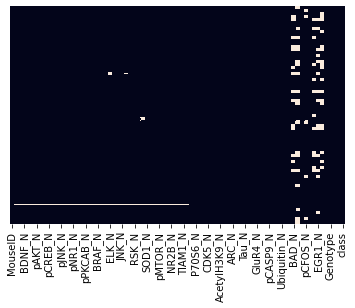

In [59]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [60]:
# Null list contains column names having null values
null_list=[]
for i in range (0,data.isnull().sum().shape[0]-1):
  if(data.isnull().sum()[i]>0):
    null_list.append(data.isnull().sum().index[i])
 #nan_cols = [i for i in data.columns if data[i].isnull().any()]

In [61]:
len(null_list)    # 49 columns having null values

49

In [62]:
# catagorical list contains column names having categorial values
cat_features=[i for i in data.columns if data.dtypes[i]=='object'] 

In [63]:
len(cat_features)    # 5 columns having categorial data

5

In [64]:
data.nunique(axis=0)

MouseID      1080
DYRK1A_N     1077
ITSN1_N      1076
BDNF_N       1077
NR1_N        1077
             ... 
CaNA_N       1080
Genotype        2
Treatment       2
Behavior        2
class           8
Length: 82, dtype: int64

In [65]:
data.shape

(1080, 82)

**clean data**

In [66]:
for i in range (0,len(null_list)-1):
  data[null_list[i]]=data[null_list[i]].fillna(data[null_list[i]].mean())

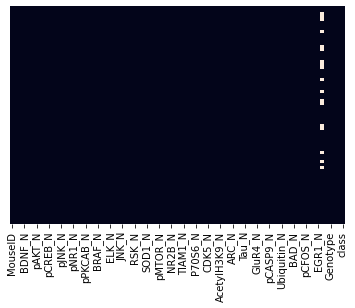

In [67]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [68]:
data.isnull().any().sum() #inplace=True

1

In [69]:
data.drop(['H3MeK4_N'],axis=1,inplace=True)

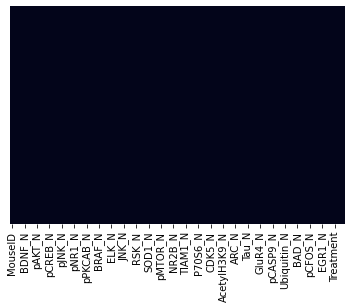

In [70]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

finally we get clean data free from missing  values

In [71]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data['MouseID']= label_encoder.fit_transform(data['MouseID']) 
  
############################conversion for that id vala part

In [72]:
data['MouseID']

0         45
1         52
2         53
3         54
4         55
        ... 
1075    1067
1076    1068
1077    1069
1078    1070
1079    1071
Name: MouseID, Length: 1080, dtype: int64

**conversion of catogorical into integer**

In [73]:
cat_features1=[i for i in data.columns if data.dtypes[i]=='object'] 

In [74]:
cat_features1

['Genotype', 'Treatment', 'Behavior', 'class']

In [75]:
def category_onehot_multcols(multcolumns):
    df_final=data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(data[fields],drop_first=True)
        
        data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([data,df_final],axis=1)
        
    return df_final

In [76]:
data1=category_onehot_multcols(cat_features1)

Genotype
Treatment
Behavior
class


In [77]:
data1.shape

(1080, 87)

increase data columns 81 to 87 due to one-hot-encoding

**handling outlire**

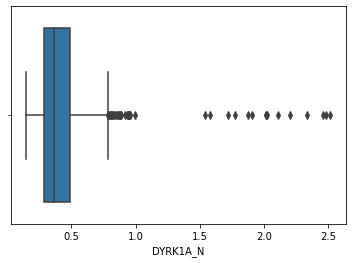

In [78]:
sns.boxplot(x=data1['DYRK1A_N'])

In [79]:
z = np.abs(stats.zscore(data1))
print(z)

[[1.58611017 0.31271112 0.5179336  ... 0.32816506 0.37796447 0.37796447]
 [1.56365765 0.35679793 0.28650133 ... 0.32816506 0.37796447 0.37796447]
 [1.56045015 0.33496588 0.45046461 ... 0.32816506 0.37796447 0.37796447]
 ...
 [1.69837277 0.79192771 0.88354273 ... 0.32816506 0.37796447 2.64575131]
 [1.70158027 0.82188815 0.8130138  ... 0.32816506 0.37796447 2.64575131]
 [1.70478778 0.49491588 0.62125474 ... 0.32816506 0.37796447 2.64575131]]


In [80]:
threshold = 3
print(np.where(z > 3))

(array([  25,   25,   25,   27,   27,   27,   27,   27,   28,   29,   30,
         30,   31,   31,   31,   32,   32,   32,   32,   46,   47,   47,
         87,   87,   87,   87,   87,   87,   87,   87,   88,   88,   88,
         88,   88,   88,   89,   89,  102,  133,  133,  162,  163,  164,
        164,  164,  165,  166,  167,  170,  175,  176,  177,  177,  177,
        177,  178,  178,  178,  178,  179,  179,  179,  181,  205,  207,
        207,  219,  220,  220,  221,  222,  222,  222,  222,  222,  223,
        223,  223,  223,  223,  223,  223,  224,  224,  224,  224,  224,
        224,  235,  237,  237,  238,  238,  239,  239,  239,  249,  249,
        249,  252,  252,  252,  253,  254,  267,  268,  282,  283,  283,
        284,  284,  284,  286,  289,  297,  298,  298,  299,  301,  302,
        302,  302,  308,  316,  317,  317,  336,  336,  336,  336,  336,
        336,  336,  337,  337,  337,  337,  337,  337,  337,  338,  338,
        338,  338,  338,  338,  338,  341,  342,  

In [81]:
data2=data1[(z < 3).all(axis=1)]

In [82]:
data2.shape

(747, 87)

after removing outlire data rows reduce to 1080 to 747

In [83]:
data2.describe()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N,Ts65Dn,Saline,S/C,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.0,747.000000,747.000000
mean,544.575636,0.400377,0.587616,0.317202,2.299005,3.905233,0.232402,0.180987,3.684056,0.209054,1.357470,0.509688,0.313297,0.317265,0.274077,0.826200,0.724572,1.561716,1.512729,0.444892,0.682331,0.353562,0.358409,0.178554,1.146933,2.461640,1.169007,0.240924,0.271267,0.693551,0.165769,0.398200,2.164682,0.536976,0.454028,0.417781,0.761767,0.577242,0.365831,0.565945,...,1.719919,0.290603,0.417056,1.199306,0.191421,0.160505,0.179494,0.122463,0.156396,0.184942,0.200702,0.118113,0.225530,0.126341,0.527970,0.290020,1.552529,2.252075,0.157147,1.242033,0.854383,0.225304,0.156580,0.132556,0.122463,0.128143,0.444445,0.163655,0.181212,1.335165,0.424364,0.405622,0.550201,0.111111,0.148594,0.133869,0.156627,0.0,0.107095,0.160643
std,303.357593,0.156520,0.168468,0.047085,0.334078,0.894404,0.036009,0.023671,1.308718,0.030996,0.277671,0.228836,0.047414,0.051526,0.041896,0.111791,0.184502,0.254798,0.452773,0.061243,0.116814,0.129735,0.049670,0.024050,0.286800,0.584720,0.200353,0.029873,0.037985,0.115246,0.025677,0.058216,0.411802,0.253105,0.059900,0.075558,0.105928,0.077812,0.056078,0.072104,...,0.550050,0.031141,0.126016,0.346142,0.125746,0.019994,0.016754,0.013809,0.013049,0.021678,0.055251,0.011106,0.032566,0.020846,0.072358,0.028716,0.223722,0.239393,0.021746,0.166579,0.083103,0.025231,0.022407,0.019241,0.013809,0.019391,0.061830,0.042716,0.031387,0.306459,0.494577,0.491341,0.497807,0.314480,0.355927,0.340739,0.363692,0.0,0.309441,0.367447
min,30.000000,0.145327,0.245359,0.185980,1.330831,1.737540,0.121545,0.116893,1.393799,0.127401,0.720767,0.149155,0.178683,0.191431,0.151208,0.500160,0.281285,0.811981,0.658181,0.271016,0.334501,0.143894,0.212960,0.113636,0.497695,1.169514,0.613636,0.149487,0.150101,0.352593,0.107394,0.235595,1.134886,0.230360,0.297549,0.258724,0.510650,0.381271,0.226409,0.377712,...,0.598767,0.197562,0.186893,0.529108,0.052528,0.116900,0.123461,0.090243,0.120272,0.125769,0.115979,0.086114,0.150163,0.082152,0.343298,0.220444,1.043180,1.562762,0.101233,0.842434,0.597782,0.165582,0.102238,0.089509,0.090243,0.085419,0.258626,0.090531,0.105537,0.586479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,282.500000,0.287969,0.472707,0.286453,2.070904,3.272430,0.207962,0.165407,2.549120,0.187428,1.188116,0.334802,0.282797,0.281881,0.244494,0.750369,0.588112,1.387088,1.182572,0.404365,0.600925,0.261223,0.328014,0.160863,0.943430,2.043212,1.042892,0.218472,0.246857,0.614040,0.146553,0.362145,1.878337,0.321818,0.415198,0.361980,0.688459,